In [2]:
# Import modules

import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def read_scene():
	data_x = misc.imread('../../Data/umass_campus_100x100x3.jpg')

	return (data_x)

if __name__ == '__main__':
	
	################################################
	# K-Means

	data_x = read_scene()
	print('X = ', data_x.shape)

	data_xx = data_x.ravel().reshape(data_x.shape[0] * data_x.shape[1], data_x.shape[2])
	print('Flattened image = ', data_xx.shape)

	print('Implement AHC here ...')

	print('Implement k-means here ...')

	reconstructed_image = data_xx.ravel().reshape(data_x.shape[0], data_x.shape[1], data_x.shape[2])
	print('Reconstructed image = ', reconstructed_image.shape)



X =  (100, 100, 3)
Flattened image =  (10000, 3)
Implement AHC here ...
Implement k-means here ...
Reconstructed image =  (100, 100, 3)


K-means, number of clusters: 2
K-means, reconstruction error: 9.93888323706
K-means, number of clusters: 5
K-means, reconstruction error: 9.44053847334
K-means, number of clusters: 10
K-means, reconstruction error: 8.74567512164
K-means, number of clusters: 25
K-means, reconstruction error: 7.73684044039
K-means, number of clusters: 50
K-means, reconstruction error: 6.91171951591
K-means, number of clusters: 75
K-means, reconstruction error: 6.3145466979
K-means, number of clusters: 100
K-means, reconstruction error: 5.81338398296
K-means, number of clusters: 200
K-means, reconstruction error: 4.81263960836


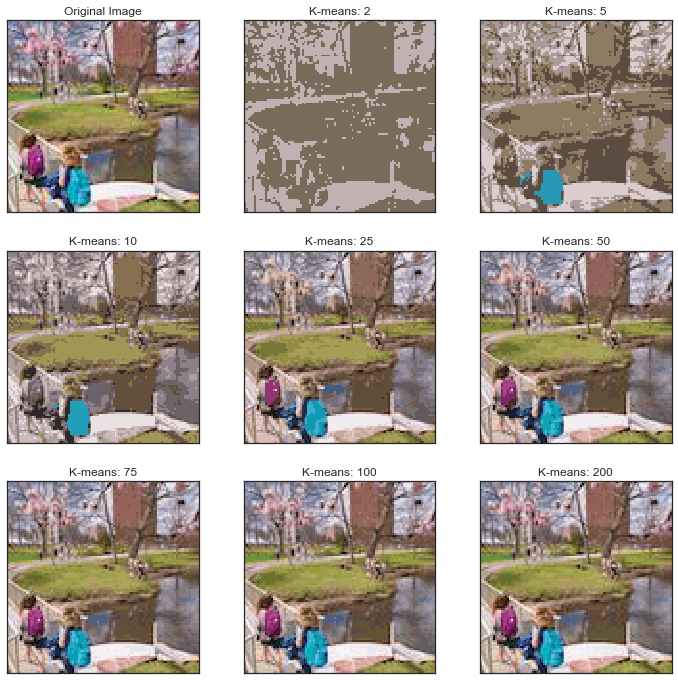

In [300]:
from sklearn.cluster import KMeans
fig, axarr = plt.subplots(3, 3, figsize=(12,12)) # rows, columns, figure size

# plot the original image
axarr[0,0].set_title("Original Image")
axarr[0,0].set_xticks([]) # tell the ticks to go away
axarr[0,0].set_yticks([])
axarr[0,0].imshow(data_x)
av=np.mean(data_xx,axis=0)

num_clusters=np.array([2,5,10,25,50,75,100,200])
err_km=np.zeros((num_clusters.size))
per_var_ex=np.zeros((num_clusters.size,3));
for i in range(len(num_clusters)):
    
    # Do your clustering
    out=np.uint8(np.zeros((10000,3)))
    n=num_clusters[i]
    kmeans = KMeans(n_clusters=n, random_state=0).fit(data_xx)
    pred=kmeans.labels_
    cents=kmeans.cluster_centers_
    
    # Reconstruct the image using your clusters
    for x in range(0, n):
        out[np.argwhere(pred==x)]=np.uint8(cents[x])
        
    recon_error=np.sqrt(np.mean((out-data_xx)**2))
    print('K-means, number of clusters:',n)  
    print('K-means, reconstruction error:',recon_error)    
    err_km[i]=recon_error

    recon_img = out.ravel().reshape(data_x.shape[0], data_x.shape[1], data_x.shape[2])
    # I called mine recon_image. It should be the same .shape as flattened_image
    
    row=np.int(np.floor((i+1)/3))
    col= np.int(i -3*row+1)
    # Plot the reconstructed image
    # I made a helper function to get the row,col from the iteration variable i
    axarr[row,col].set_xticks([]) # tell the ticks to go away
    axarr[row,col].set_yticks([])
    axarr[row,col].set_title("K-means: " + str(n))
    axarr[row,col].imshow(misc.toimage(recon_img.reshape(data_x.shape)))
    exp_var=np.sum((out-av)**2,axis=0)
    unexp_var= np.sum((out-data_xx)**2, axis=0) 
    per_var_ex[i,:]=exp_var/unexp_var
    plt.show()


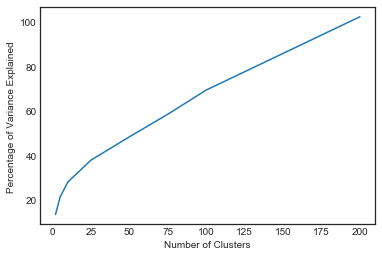

In [301]:
    
##### Plot the elbow curve
plt.figure()
plt.plot(num_clusters, np.mean(per_var_ex,axis=1))
plt.ylabel('Percentage of Variance Explained ')
plt.xlabel('Number of Clusters')
plt.show()

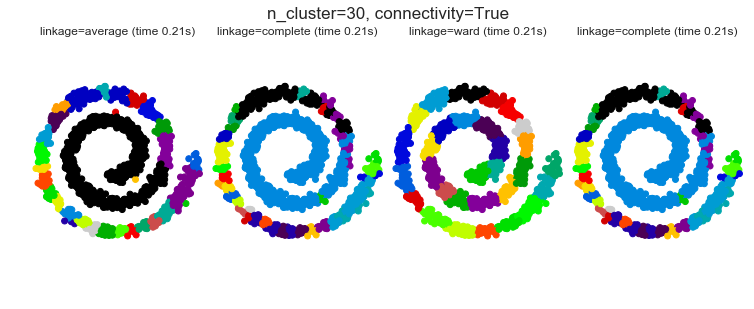

In [173]:
#Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)
connectivity=knn_graph
n_clusters=30
plt.figure(figsize=(10, 4))
for index, linkage in enumerate(('average', 'complete', 'ward','complete')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            model.fit(X)

            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

HAC, number of clusters: 2
HAC, reconstruction error: 10.1645691825
HAC, number of clusters: 5
HAC, reconstruction error: 9.53522766727
HAC, number of clusters: 10
HAC, reconstruction error: 8.78479937164
HAC, number of clusters: 25
HAC, reconstruction error: 7.96045643582
HAC, number of clusters: 50
HAC, reconstruction error: 7.09781421754
HAC, number of clusters: 75
HAC, reconstruction error: 6.61342321848
HAC, number of clusters: 100
HAC, reconstruction error: 6.14930348359
HAC, number of clusters: 200
HAC, reconstruction error: 5.07366074283


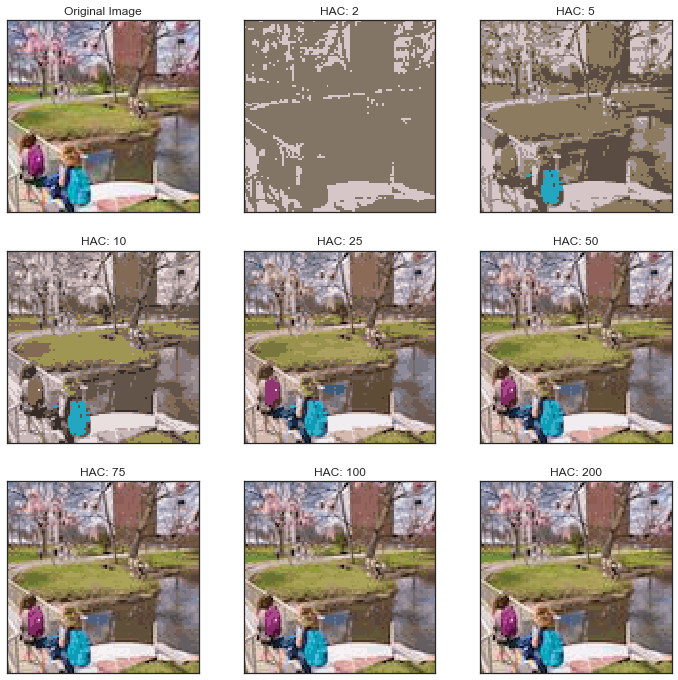

In [298]:
from sklearn.cluster import AgglomerativeClustering
fig, axarr = plt.subplots(3, 3, figsize=(12,12)) # rows, columns, figure size

# plot the original image
axarr[0,0].set_title("Original Image")
axarr[0,0].set_xticks([]) # tell the ticks to go away
axarr[0,0].set_yticks([])
axarr[0,0].imshow(data_x)

num_clusters=np.array([2,5,10,25,50,75,100,200])
#num_clusters=np.array([25,200])
err_hac=np.zeros((num_clusters.size))
per_var_ex=np.zeros((num_clusters.size,3));
av=np.mean(data_xx,axis=0)

for i in range(len(num_clusters)):
    
    # Do your clustering
    out2=np.uint8(np.zeros((10000,3)))
    out=np.uint8(np.zeros((10000,3)))
    n=num_clusters[i]
    print('HAC, number of clusters:',n)
    myHAC=AgglomerativeClustering(n_clusters=n,affinity='euclidean',linkage='ward')
    out2=myHAC.fit(data_xx)
    pred=out2.labels_
    
    ### cents contains the centroids
    cents=np.zeros((n,3))
    exp_var=np.zeros((1,3))
    
    ### find the centroids and reconstruct the image using your clusters
    for x in range(0, n):
        cents[x,:]=np.mean(data_xx[np.argwhere(pred==x)],axis=0)
        out[np.argwhere(pred==x)]=np.uint8(cents[x])
        nums=len(np.argwhere(pred==x)) 
    
   
    recon_error=np.sqrt(np.mean((out-data_xx)**2))
    print('HAC, reconstruction error:',recon_error)
    err_hac[i]=recon_error
        
    recon_img = out.ravel().reshape(data_x.shape[0], data_x.shape[1], data_x.shape[2])
    # I called mine recon_image. It should be the same .shape as flattened_image
    
    row=np.int(np.floor((i+1)/3))
    col= np.int(i -3*row+1)
    # Plot the reconstructed image
    # I made a helper function to get the row,col from the iteration variable i
    axarr[row,col].set_xticks([]) # tell the ticks to go away
    axarr[row,col].set_yticks([])
    axarr[row,col].set_title("HAC: " + str(n))
    axarr[row,col].imshow(misc.toimage(recon_img.reshape(data_x.shape)))
    exp_var=np.sum((out-av)**2,axis=0)
    unexp_var= np.sum((out-data_xx)**2, axis=0) 
    per_var_ex[i,:]=exp_var/unexp_var

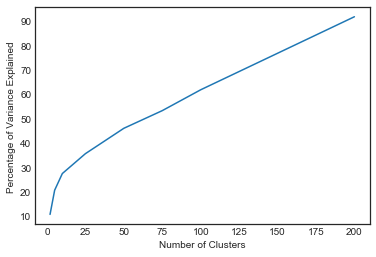

In [299]:
    
##### Plot the elbow curve
plt.plot(num_clusters, np.mean(per_var_ex,axis=1))
plt.ylabel('Percentage of Variance Explained ')
plt.xlabel('Number of Clusters')
plt.show()